In [1]:
import seml
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from datasets.data_constants import *

plt.rcParams['figure.figsize'] = [8, 5]

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/database.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
#db_collection = seml.database.get_collection('segmentation_pretrain_pirl_ablation').drop

In [4]:
results_src = seml.get_results('segmentation_loss_ablation', to_data_frame=True)

In [5]:
results_src

,_id,config.overwrite,config.db_collection,config.backbone,config.batches_to_eval_train,config.batches_to_visualize,config.classification_head,config.display_step,config.epoch_to_resume,config.gamma,...,config.target_val_labels,config.train_batch_size,config.val_batch_size,config.weight_decay,result.src_loss,result.src_pixel_accuracy,result.src_classwise_iou,result.tar_loss,result.tar_pixel_accuracy,result.tar_classwise_iou
0,1,1,segmentation_loss_ablation,resnet50,5,5,fcn,100,0,0.0,...,cityscapes_labels_val.txt,2,2,0.0005,0.190181,0.937070,"[0.9622299671173096, 0.8464823365211487, 0.871...",0.798591,0.738352,"[0.5865553617477417, 0.18773138523101807, 0.74..."
1,2,2,segmentation_loss_ablation,resnet50,5,5,fcn,100,0,0.5,...,cityscapes_labels_val.txt,2,2,0.0005,0.139151,0.935013,"[0.9603629112243652, 0.8406376838684082, 0.866...",0.593751,0.727018,"[0.5626215934753418, 0.18241555988788605, 0.72..."
2,3,3,segmentation_loss_ablation,resnet50,5,5,fcn,100,0,1.0,...,cityscapes_labels_val.txt,2,2,0.0005,0.116875,0.933778,"[0.9589309692382812, 0.8361718654632568, 0.864...",0.496675,0.730238,"[0.5724414587020874, 0.1879119873046875, 0.718..."
3,4,4,segmentation_loss_ablation,resnet50,5,5,fcn,100,0,2.0,...,cityscapes_labels_val.txt,2,2,0.0005,0.087210,0.930816,"[0.9555853605270386, 0.82515949010849, 0.85861...",0.375414,0.735309,"[0.5893347263336182, 0.19673576951026917, 0.70..."
4,5,5,segmentation_loss_ablation,resnet50,5,5,fcn,100,0,5.0,...,cityscapes_labels_val.txt,2,2,0.0005,0.045614,0.921487,"[0.9418248534202576, 0.780397355556488, 0.8462...",0.198487,0.758857,"[0.6595286726951599, 0.2304079830646515, 0.700..."


In [6]:
results_src_miou = \
results_src[['config.gamma', 'config.segmentation_loss', 
             'result.src_pixel_accuracy', 'result.src_classwise_iou', 
             'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                {'config.gamma': lambda x: x,
                 'config.segmentation_loss': lambda x: x,
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x),
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_src_miou = results_src_miou.groupby(by=['config.segmentation_loss', 'config.gamma']).max()
src_model_miou = results_src_miou['result.tar_classwise_iou'].max()
src_model_pixel_accuracy = results_src_miou['result.tar_pixel_accuracy'].max()
results_src_miou

result.src_pixel_accuracy  \
config.segmentation_loss config.gamma                              
ce                       0.0                            0.937070   
focal                    0.5                            0.935013   
                         1.0                            0.933778   
                         2.0                            0.930816   
                         5.0                            0.921487   

                                       result.src_classwise_iou  \
config.segmentation_loss config.gamma                             
ce                       0.0                           0.687053   
focal                    0.5                           0.678540   
                         1.0                           0.676900   
                         2.0                           0.667763   
                         5.0                           0.649436   

                                       result.tar_pixel_accuracy  \
config.segmentation_loss config.gamma                              
ce                       0.0                            0.738352   
focal                    0.5                            0.727018   
                         1.0                            0.730238   
                         2.0                            0.735309   
                         5.0                            0.758857   

                                       result.tar_classwise_iou  
config.segmentation_loss config.gamma                            
ce                       0.0                           0.341408  
focal                    0.5                           0.336267  
                         1.0                           0.336495  
                         2.0                           0.335564  
                         5.0                           0.333886

In [6]:
results_src_miou.to_latex('/nfs/students/mirlas/tables/results_src_miou.tex', float_format="%.3f", 
                          columns=['result.src_classwise_iou', 'result.tar_classwise_iou'],
                          bold_rows=True, multicolumn=True, multirow=True, 
                          caption='Loss Function Study for Semantic Image Segmentation Model Trained on the Source Dataset', 
                          label='table:src_loss_ablation')

In [7]:
results_tar = seml.get_results('segmentation_loss_tar_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [8]:
results_tar

,_id,config.overwrite,config.db_collection,config.backbone,config.batches_to_eval_train,config.batches_to_visualize,config.classification_head,config.display_step,config.gamma,config.image_height,...,config.target_val_labels,config.train_batch_size,config.val_batch_size,config.weight_decay,result.src_loss,result.src_pixel_accuracy,result.src_classwise_iou,result.tar_loss,result.tar_pixel_accuracy,result.tar_classwise_iou
0,1,1,segmentation_loss_tar_ablation,resnet50,5,5,fcn,100,0.0,400,...,gta5_labels_val.txt,2,2,0.0005,0.228161,0.923923,"[0.9602186679840088, 0.7073665261268616, 0.863...",0.775057,0.797132,"[0.7780410051345825, 0.31574612855911255, 0.72..."
1,2,2,segmentation_loss_tar_ablation,resnet50,5,5,fcn,100,0.5,400,...,gta5_labels_val.txt,2,2,0.0005,0.166220,0.921501,"[0.9578864574432373, 0.6951896548271179, 0.859...",0.556731,0.791268,"[0.767021894454956, 0.31043046712875366, 0.717..."
2,3,3,segmentation_loss_tar_ablation,resnet50,5,5,fcn,100,1.0,400,...,gta5_labels_val.txt,2,2,0.0005,0.141701,0.920044,"[0.956298828125, 0.686927080154419, 0.85736268...",0.472310,0.786811,"[0.7581703662872314, 0.3067981004714966, 0.715..."
3,4,4,segmentation_loss_tar_ablation,resnet50,5,5,fcn,100,2.0,400,...,gta5_labels_val.txt,2,2,0.0005,0.108095,0.917046,"[0.9530219435691833, 0.6696275472640991, 0.853...",0.361050,0.778410,"[0.7428687810897827, 0.29943323135375977, 0.70..."
4,5,5,segmentation_loss_tar_ablation,resnet50,5,5,fcn,100,5.0,400,...,gta5_labels_val.txt,2,2,0.0005,0.060220,0.907168,"[0.9414836764335632, 0.606501579284668, 0.8407...",0.201165,0.762029,"[0.7211601734161377, 0.28420397639274597, 0.68..."


In [9]:
results_tar_miou = \
results_tar[['config.gamma', 'config.segmentation_loss', 
             'result.tar_pixel_accuracy','result.tar_classwise_iou',
             'result.src_pixel_accuracy', 'result.src_classwise_iou']].apply(
                {'config.gamma': lambda x: x,
                 'config.segmentation_loss': lambda x: x,
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x),
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.src_classwise_iou'], ascending=False)
results_tar_miou = results_tar_miou.groupby(by=['config.segmentation_loss', 'config.gamma']).max()
oracle_model_miou = results_tar_miou['result.src_classwise_iou'].max()
oracle_model_pixel_accuracy = results_tar_miou['result.src_pixel_accuracy'].max()
results_tar_miou

result.tar_pixel_accuracy  \
config.segmentation_loss config.gamma                              
ce                       0.0                            0.797132   
focal                    0.5                            0.791268   
                         1.0                            0.786811   
                         2.0                            0.778410   
                         5.0                            0.762029   

                                       result.tar_classwise_iou  \
config.segmentation_loss config.gamma                             
ce                       0.0                           0.401903   
focal                    0.5                           0.398084   
                         1.0                           0.395057   
                         2.0                           0.388973   
                         5.0                           0.375059   

                                       result.src_pixel_accuracy  \
config.segmentation_loss config.gamma                              
ce                       0.0                            0.923923   
focal                    0.5                            0.921501   
                         1.0                            0.920044   
                         2.0                            0.917046   
                         5.0                            0.907168   

                                       result.src_classwise_iou  
config.segmentation_loss config.gamma                            
ce                       0.0                           0.588039  
focal                    0.5                           0.580622  
                         1.0                           0.577186  
                         2.0                           0.570620  
                         5.0                           0.551152

In [10]:
results_tar_miou.to_latex('/nfs/students/mirlas/tables/results_tar_miou.tex', float_format="%.3f", 
                          columns=['result.tar_classwise_iou', 'result.src_classwise_iou'],
                          bold_rows=True, multicolumn=True, multirow=True,
                          caption='Orcale Model Performance Trained on the Target Dataset', 
                          label='table:tar_loss_ablation')

In [8]:
results_da = seml.get_results('segmentation_da_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [9]:
results_da

,_id,config.overwrite,config.db_collection,config.backbone,config.batches_to_eval_train,config.batches_to_visualize,config.betas_da,config.classification_head,config.da_injection_point,config.display_step,...,config.target_val_labels,config.train_batch_size,config.val_batch_size,config.weight_decay,result.src_loss,result.src_pixel_accuracy,result.src_classwise_iou,result.tar_loss,result.tar_pixel_accuracy,result.tar_classwise_iou
0,1,1,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.213472,0.931959,"[0.9578487277030945, 0.8295687437057495, 0.862...",0.686712,0.805098,"[0.8479262590408325, 0.37471991777420044, 0.73..."
1,2,2,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.239749,0.926407,"[0.9517138600349426, 0.8115570545196533, 0.853...",0.994522,0.735476,"[0.7434136867523193, 0.3045333921909332, 0.639..."
2,3,3,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.359713,0.877139,"[0.8858826756477356, 0.5259976387023926, 0.771...",1.070760,0.699448,"[0.8028126358985901, 0.2507179081439972, 0.582..."
3,4,4,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.207245,0.932785,"[0.9586865901947021, 0.833632230758667, 0.8632...",0.727166,0.781612,"[0.7808946371078491, 0.30653005838394165, 0.75..."
4,5,5,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.272204,0.908298,"[0.9253771901130676, 0.7087860107421875, 0.835...",0.732540,0.796251,"[0.830683171749115, 0.21758143603801727, 0.739..."
5,6,6,segmentation_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.652489,0.783383,"[0.8511540293693542, 0.40332746505737305, 0.56...",1.262634,0.663150,"[0.8151896595954895, 0.05437832698225975, 0.43..."


In [10]:
results_da_miou = \
results_da[['config.lambda_da', 'config.da_injection_point', 
            'result.src_pixel_accuracy', 'result.src_classwise_iou', 
            'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                {'config.lambda_da': lambda x: x,
                 'config.da_injection_point': lambda x: x,
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x),
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_da_miou = results_da_miou.groupby(by=['config.da_injection_point', 'config.lambda_da']).max()
results_da_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_da_miou['result.tar_classwise_iou']
results_da_miou['tar_classwise_iou_gain'] = results_da_miou['result.tar_classwise_iou'] - src_model_miou
results_da_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_da_miou['result.tar_pixel_accuracy']
results_da_miou['tar_pixel_accuracy_gain'] = results_da_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_da_miou

result.src_pixel_accuracy  \
config.da_injection_point config.lambda_da                              
feature                   0.001                              0.932785   
                          0.010                              0.908298   
                          0.100                              0.783383   
output                    0.001                              0.931959   
                          0.010                              0.926407   
                          0.100                              0.877139   

                                            result.src_classwise_iou  \
config.da_injection_point config.lambda_da                             
feature                   0.001                             0.665597   
                          0.010                             0.563066   
                          0.100                             0.325560   
output                    0.001                             0.675498   
                          0.010                             0.630368   
                          0.100                             0.510109   

                                            result.tar_pixel_accuracy  \
config.da_injection_point config.lambda_da                              
feature                   0.001                              0.781612   
                          0.010                              0.796251   
                          0.100                              0.663150   
output                    0.001                              0.805098   
                          0.010                              0.735476   
                          0.100                              0.699448   

                                            result.tar_classwise_iou  \
config.da_injection_point config.lambda_da                             
feature                   0.001                             0.318737   
                          0.010                             0.280352   
                          0.100                             0.162135   
output                    0.001                             0.332418   
                          0.010                             0.283799   
                          0.100                             0.209542   

                                            tar_classwise_iou_gap  \
config.da_injection_point config.lambda_da                          
feature                   0.001                          0.269302   
                          0.010                          0.307687   
                          0.100                          0.425904   
output                    0.001                          0.255621   
                          0.010                          0.304240   
                          0.100                          0.378497   

                                            tar_classwise_iou_gain  \
config.da_injection_point config.lambda_da                           
feature                   0.001                          -0.022672   
                          0.010                          -0.061056   
                          0.100                          -0.179273   
output                    0.001                          -0.008991   
                          0.010                          -0.057609   
                          0.100                          -0.131867   

                                            tar_pixel_accuracy_gap  \
config.da_injection_point config.lambda_da                           
feature                   0.001                           0.142312   
                          0.010                           0.127673   
                          0.100                           0.260773   
output                    0.001                           0.118825   
                          0.010                           0.188447   
                          0.100                           0.224476   

                                            t

In [14]:
results_da_miou.to_latex('/nfs/students/mirlas/tables/results_da_miou.tex', float_format="%.3f", 
                         columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                         bold_rows=True, multicolumn=True, multirow=True, 
                         caption='Adversarial Domain Discrimination Based Model Trained End-to-End from Scratch', 
                         label='table:da_ablation')

In [11]:
results_da_pretr = seml.get_results('segmentation_pretrain_da_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [12]:
results_da_pretr

,_id,config.overwrite,config.db_collection,config.backbone,config.batches_to_eval_train,config.batches_to_visualize,config.betas_da,config.classification_head,config.da_injection_point,config.display_step,...,config.target_val_labels,config.train_batch_size,config.val_batch_size,config.weight_decay,result.src_loss,result.src_pixel_accuracy,result.src_classwise_iou,result.tar_loss,result.tar_pixel_accuracy,result.tar_classwise_iou
0,1,1,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.228148,0.923513,"[0.9316750168800354, 0.7263240218162537, 0.868...",0.563113,0.833043,"[0.8253524303436279, 0.3077075481414795, 0.773..."
1,2,2,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.267219,0.910951,"[0.9029280543327332, 0.6055191159248352, 0.866...",0.575385,0.832189,"[0.8605196475982666, 0.3878287076950073, 0.749..."
2,3,3,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,output,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.272506,0.908102,"[0.9019438624382019, 0.6014631986618042, 0.860...",0.741528,0.798147,"[0.8656526207923889, 0.39265304803848267, 0.74..."
3,4,4,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.208024,0.931421,"[0.9513489007949829, 0.8067919015884399, 0.868...",0.560237,0.824650,"[0.8112320303916931, 0.2752160429954529, 0.773..."
4,5,5,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.212892,0.930560,"[0.9549347162246704, 0.8218129277229309, 0.862...",0.611296,0.808037,"[0.7960342764854431, 0.29527610540390015, 0.74..."
5,6,6,segmentation_pretrain_da_ablation,resnet50,5,5,"[0.9, 0.99]",fcn,feature,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.248676,0.916543,"[0.9308744072914124, 0.7279232144355774, 0.851...",0.766693,0.783376,"[0.8672000169754028, 0.40722307562828064, 0.72..."


In [13]:
results_da_pretr_miou = \
results_da_pretr[['config.lambda_da', 'config.da_injection_point', 
                  'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                  'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                {'config.lambda_da': lambda x: x,
                 'config.da_injection_point': lambda x: x,
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x),
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_da_pretr_miou = results_da_pretr_miou.groupby(by=['config.da_injection_point', 'config.lambda_da']).max()
results_da_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_da_pretr_miou['result.tar_classwise_iou']
results_da_pretr_miou['tar_classwise_iou_gain'] = results_da_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_da_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_da_pretr_miou['result.tar_pixel_accuracy']
results_da_pretr_miou['tar_pixel_accuracy_gain'] = results_da_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_da_pretr_miou

result.src_pixel_accuracy  \
config.da_injection_point config.lambda_da                              
feature                   0.0002                             0.931421   
                          0.0010                             0.930560   
                          0.0050                             0.916543   
output                    0.0002                             0.923513   
                          0.0010                             0.910951   
                          0.0050                             0.908102   

                                            result.src_classwise_iou  \
config.da_injection_point config.lambda_da                             
feature                   0.0002                            0.672859   
                          0.0010                            0.661591   
                          0.0050                            0.625281   
output                    0.0002                            0.670005   
                          0.0010                            0.661901   
                          0.0050                            0.639476   

                                            result.tar_pixel_accuracy  \
config.da_injection_point config.lambda_da                              
feature                   0.0002                             0.824650   
                          0.0010                             0.808037   
                          0.0050                             0.783376   
output                    0.0002                             0.833043   
                          0.0010                             0.832189   
                          0.0050                             0.798147   

                                            result.tar_classwise_iou  \
config.da_injection_point config.lambda_da                             
feature                   0.0002                            0.357304   
                          0.0010                            0.337315   
                          0.0050                            0.289669   
output                    0.0002                            0.373343   
                          0.0010                            0.356813   
                          0.0050                            0.324572   

                                            tar_classwise_iou_gap  \
config.da_injection_point config.lambda_da                          
feature                   0.0002                         0.230735   
                          0.0010                         0.250724   
                          0.0050                         0.298369   
output                    0.0002                         0.214695   
                          0.0010                         0.231226   
                          0.0050                         0.263467   

                                            tar_classwise_iou_gain  \
config.da_injection_point config.lambda_da                           
feature                   0.0002                          0.015895   
                          0.0010                         -0.004094   
                          0.0050                         -0.051739   
output                    0.0002                          0.031935   
                          0.0010                          0.015405   
                          0.0050                         -0.016836   

                                            tar_pixel_accuracy_gap  \
config.da_injection_point config.lambda_da                           
feature                   0.0002                          0.099273   
                          0.0010                          0.115887   
                          0.0050                          0.140547   
output                    0.0002                          0.090880   
                          0.0010                          0.091734   
                          0.0050                          0.125776   

                                            t

In [18]:
results_da_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_da_pretr_miou.tex', float_format="%.3f", 
                         bold_rows=True, multicolumn=True, multirow=True, 
                         columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                         caption='Adversarial Domain Discrimination Based Model Pretrained on the Source Dataset', 
                         label='table:da_pretr_ablation')

In [2]:
results_rot_pretr = seml.get_results('segmentation_pretrain_rot_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results_rot_pretr

,_id,config.overwrite,config.db_collection,config.aux_injection_point,config.backbone,config.batches_to_eval_train,config.batches_to_visualize,config.betas_aux,config.classification_head,config.display_step,...,config.target_val_labels,config.train_batch_size,config.val_batch_size,config.weight_decay,result.src_loss,result.src_pixel_accuracy,result.src_classwise_iou,result.tar_loss,result.tar_pixel_accuracy,result.tar_classwise_iou
0,1,1,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.226754,0.927640,"[0.9512360692024231, 0.8096864819526672, 0.857...",0.600917,0.818819,"[0.7923955321311951, 0.2473587989807129, 0.787..."
1,2,2,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.208019,0.932460,"[0.9579630494117737, 0.8307637572288513, 0.864...",0.622994,0.796814,"[0.7310874462127686, 0.22733257710933685, 0.79..."
2,3,3,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.201610,0.934050,"[0.958928644657135, 0.833558976650238, 0.86780...",0.589400,0.801599,"[0.7362502813339233, 0.2261904627084732, 0.799..."
3,4,4,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.224395,0.927095,"[0.9476606249809265, 0.7964901328086853, 0.860...",0.559167,0.827618,"[0.8026266098022461, 0.2508298456668854, 0.794..."
4,5,5,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.207960,0.932232,"[0.9574939608573914, 0.8282248973846436, 0.864...",0.605466,0.798636,"[0.731810986995697, 0.2265157848596573, 0.7974..."
5,6,6,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.202109,0.933941,"[0.9584814310073853, 0.8320302367210388, 0.868...",0.570912,0.806724,"[0.7476598620414734, 0.23244841396808624, 0.79..."
6,7,7,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.242883,0.924112,"[0.9486929774284363, 0.8066073060035706, 0.850...",0.578508,0.818245,"[0.7906060218811035, 0.24246846139431, 0.78457..."
7,8,8,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.215957,0.929949,"[0.9539703726768494, 0.815562903881073, 0.8627...",0.601745,0.791275,"[0.708949089050293, 0.21662937104701996, 0.799..."
8,9,9,segmentation_pretrain_rot_ablation,output,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.206088,0.933127,"[0.9562212228775024, 0.8258365988731384, 0.868...",0.522875,0.824225,"[0.7891499996185303, 0.2546079158782959, 0.802..."
9,10,10,segmentation_pretrain_rot_ablation,feature,resnet50,5,5,"[0.9, 0.99]",fcn,100,...,cityscapes_labels_val.txt,2,2,0.0005,0.228616,0.927580,"[0.9523103833198547, 0.8117993474006653, 0.860...",0.636567,0.811026,"[0.7787435054779053, 0.2304709404706955, 0.774..."


In [12]:
results_rot_pretr_miou = \
results_rot_pretr[['config.lambda_aux', 'config.aux_injection_point', 'config.size_crop', 
                   'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                   'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                {'config.lambda_aux': lambda x: x,
                 'config.aux_injection_point': lambda x: x,
                 'config.size_crop': lambda x: x,
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x),
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_rot_pretr_miou = results_rot_pretr_miou.groupby(by=['config.size_crop', 'config.aux_injection_point', 'config.lambda_aux']).max()
results_rot_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_rot_pretr_miou['result.tar_classwise_iou']
results_rot_pretr_miou['tar_classwise_iou_gain'] = results_rot_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_rot_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_rot_pretr_miou['result.tar_pixel_accuracy']
results_rot_pretr_miou['tar_pixel_accuracy_gain'] = results_rot_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_rot_pretr_miou

result.src_pixel_accuracy  \
config.size_crop config.aux_injection_point config.lambda_aux                              
128              feature                    0.005                               0.927580   
                                            0.050                               0.920387   
                                            0.500                               0.869176   
                 output                     0.005                               0.927640   
                                            0.050                               0.927095   
                                            0.500                               0.924112   
256              feature                    0.005                               0.933505   
                                            0.050                               0.933413   
                                            0.500                               0.932173   
                 output                     0.005                               0.932460   
                                            0.050                               0.932232   
                                            0.500                               0.929949   
400              feature                    0.005                               0.934469   
                                            0.050                               0.934465   
                                            0.500                               0.934478   
                 output                     0.005                               0.934050   
                                            0.050                               0.933941   
                                            0.500                               0.933127   

                                                               result.src_classwise_iou  \
config.size_crop config.aux_injection_point config.lambda_aux                             
128              feature                    0.005                              0.655353   
                                            0.050                              0.631126   
                                            0.500                              0.455637   
                 output                     0.005                              0.661256   
                                            0.050                              0.655642   
                                            0.500                              0.622157   
256              feature                    0.005                              0.678091   
                                            0.050                              0.678100   
                                            0.500                              0.675493   
                 output                     0.005                              0.675203   
                                            0.050                              0.674753   
                                            0.500                              0.664750   
400              feature                    0.005                              0.682128   
                                            0.050                              0.682216   
                                            0.500                              0.682526   
                 output                     0.005                              0.679286   
                                            0.050                              0.678803   
                                            0.500                              0.666063   

                                                               result.tar_pixel_accuracy  \
config.size_crop config.aux_injection_point config.lambda_aux                              
128              feature                    0.005                               0.811026   
                                            0.050                               0.782457   
                                 

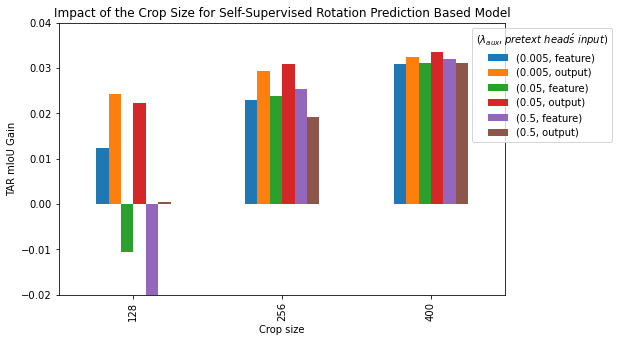

In [13]:
results_rot_pretr_miou['tar_classwise_iou_gain'].unstack().unstack().plot(kind='bar')
plt.title(r'Impact of the Crop Size for Self-Supervised Rotation Prediction Based Model')
plt.xlabel(r'Crop size')
plt.ylabel(r'TAR mIoU Gain')
plt.ylim(-0.02, 0.04)
plt.legend(title=r'$(\lambda_{aux}, pretext \ head\'s \ input)$',
           loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot.png', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot.pdf', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot.svg', format='svg', bbox_inches='tight')

In [17]:
results_rot_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_rot_pretr_miou.tex', float_format="%.3f", 
                                columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                bold_rows=True, multicolumn=True, multirow=True, 
                                caption='Self-Supervised Rotation Prediction Based Model', 
                                label='table:rot_pretr_ablation')

In [14]:
results_jigsaw_pretr = seml.get_results('segmentation_pretrain_jigsaw_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [15]:
results_jigsaw_pretr_miou = \
results_jigsaw_pretr[['config.lambda_aux', 'config.aux_injection_point', 'config.grid_size', 
                      'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                      'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                        {'config.lambda_aux': lambda x: x,
                         'config.aux_injection_point': lambda x: x,
                         'config.grid_size': lambda x: str(x[0]) + 'x' + str(x[1]),
                         'result.src_pixel_accuracy': lambda x: x,
                         'result.src_classwise_iou': lambda x: sum(x)/len(x),
                         'result.tar_pixel_accuracy': lambda x: x,
                         'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_jigsaw_pretr_miou = results_jigsaw_pretr_miou.groupby(by=['config.grid_size', 'config.aux_injection_point', 'config.lambda_aux']).max()
results_jigsaw_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_jigsaw_pretr_miou['result.tar_classwise_iou']
results_jigsaw_pretr_miou['tar_classwise_iou_gain'] = results_jigsaw_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_jigsaw_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_jigsaw_pretr_miou['result.tar_pixel_accuracy']
results_jigsaw_pretr_miou['tar_pixel_accuracy_gain'] = results_jigsaw_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_jigsaw_pretr_miou

result.src_pixel_accuracy  \
config.grid_size config.aux_injection_point config.lambda_aux                              
1x2              feature                    0.005                               0.935464   
                                            0.050                               0.935457   
                                            0.500                               0.935452   
                 output                     0.005                               0.936003   
                                            0.050                               0.935999   
                                            0.500                               0.935860   
2x4              feature                    0.005                               0.935604   
                                            0.050                               0.935518   
                                            0.500                               0.934886   
                 output                     0.005                               0.934551   
                                            0.050                               0.933680   
                                            0.500                               0.932658   
4x8              feature                    0.005                               0.932841   
                                            0.050                               0.931239   
                                            0.500                               0.927649   
                 output                     0.005                               0.914489   
                                            0.050                               0.901600   
                                            0.500                               0.894224   

                                                               result.src_classwise_iou  \
config.grid_size config.aux_injection_point config.lambda_aux                             
1x2              feature                    0.005                              0.677253   
                                            0.050                              0.677250   
                                            0.500                              0.677412   
                 output                     0.005                              0.683985   
                                            0.050                              0.684067   
                                            0.500                              0.682091   
2x4              feature                    0.005                              0.678184   
                                            0.050                              0.678932   
                                            0.500                              0.677530   
                 output                     0.005                              0.679304   
                                            0.050                              0.676059   
                                            0.500                              0.672943   
4x8              feature                    0.005                              0.671445   
                                            0.050                              0.669054   
                                            0.500                              0.662907   
                 output                     0.005                              0.655935   
                                            0.050                              0.610412   
                                            0.500                              0.584874   

                                                               result.tar_pixel_accuracy  \
config.grid_size config.aux_injection_point config.lambda_aux                              
1x2              feature                    0.005                               0.792175   
                                            0.050                               0.792462   
                                 

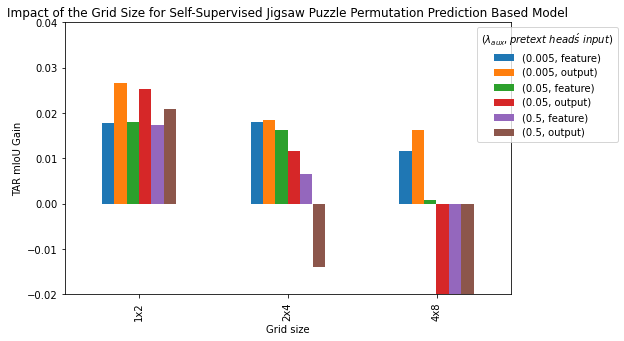

In [16]:
results_jigsaw_pretr_miou['tar_classwise_iou_gain'].unstack().unstack().plot(kind='bar')
plt.title(r'Impact of the Grid Size for Self-Supervised Jigsaw Puzzle Permutation Prediction Based Model')
plt.xlabel(r'Grid size')
plt.ylabel(r'TAR mIoU Gain')
plt.ylim(-0.02, 0.04)
plt.legend(title=r'$(\lambda_{aux}, pretext \ head\'s \ input)$',
           loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw.png', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw.pdf', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw.svg', format='svg', bbox_inches='tight')

In [105]:
results_jigsaw_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_jigsaw_pretr_miou.tex', float_format="%.3f", 
                                   columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                   bold_rows=True, multicolumn=True, multirow=True, 
                                   caption='Self-Supervised Jigsaw Puzzle Pertrubation Prediction Based Model', 
                                   label='table:jigsaw_pretr_ablation')

In [20]:
results_pirl_pretr = seml.get_results('segmentation_pretrain_pirl_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [21]:
results_pirl_pretr_miou = \
results_pirl_pretr[['config.temperature', 'config.proj_size', 'config.memory_bank_params', 
                    'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                    'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                {'config.temperature': lambda x: x, 
                 'config.proj_size': lambda x: x, 
                 'config.memory_bank_params': lambda x: x[0],
                 'result.src_pixel_accuracy': lambda x: x,
                 'result.src_classwise_iou': lambda x: sum(x)/len(x),
                 'result.tar_pixel_accuracy': lambda x: x,
                 'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_pirl_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_pirl_pretr_miou['result.tar_classwise_iou']
results_pirl_pretr_miou['tar_classwise_iou_gain'] = results_pirl_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_pirl_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_pirl_pretr_miou['result.tar_pixel_accuracy']
results_pirl_pretr_miou['tar_pixel_accuracy_gain'] = results_pirl_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_pirl_pretr_miou = results_pirl_pretr_miou.groupby(by=['config.temperature', 'config.memory_bank_params', 'config.proj_size']).max()
results_pirl_pretr_miou

result.src_pixel_accuracy  \
config.temperature config.memory_bank_params config.proj_size                              
0.05               512                       64                                 0.897775   
                                             128                                0.922837   
                                             256                                0.925675   
                   1024                      64                                 0.887196   
                                             128                                0.915298   
                                             256                                0.911461   
                   2048                      64                                 0.848546   
                                             128                                0.913613   
                                             256                                0.915365   
0.25               512                       64                                 0.926507   
                                             128                                0.933917   
                                             256                                0.933532   
                   1024                      64                                 0.925461   
                                             128                                0.929222   
                                             256                                0.930835   
                   2048                      64                                 0.928641   
                                             128                                0.918057   
                                             256                                0.928970   
1.25               512                       64                                 0.931444   
                                             128                                0.934375   
                                             256                                0.935355   
                   1024                      64                                 0.930133   
                                             128                                0.933666   
                                             256                                0.934143   
                   2048                      64                                 0.914954   
                                             128                                0.932752   
                                             256                                0.933604   

                                                               result.src_classwise_iou  \
config.temperature config.memory_bank_params config.proj_size                             
0.05               512                       64                                0.595953   
                                             128                               0.622673   
                                             256                               0.619914   
                   1024                      64                                0.566441   
                                             128                               0.601170   
                                             256                               0.554539   
                   2048                      64                                0.448257   
                                             128                               0.591767   
                                             256                               0.532572   
0.25               512                       64                                0.639363   
                                             128                               0.658372   
                                             256                               0.654856   
                   1024                      64                                0.622040   
                             

In [114]:
results_pirl_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_pirl_pretr_miou.tex', float_format="%.3f", 
                                 columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                 bold_rows=True, multicolumn=True, multirow=True, 
                                 caption='Self-Supervised PIRL Based Model', 
                                 label='table:pirl_pretr_ablation')

In [17]:
results_pirl2_pretr = seml.get_results('segmentation_pretrain_pirl2_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [18]:
results_pirl2_pretr_miou = \
results_pirl2_pretr[['config.grid_size', 'config.temperature', 'config.proj_size', 'config.memory_bank_params', 
                     'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                     'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                 {'config.grid_size': lambda x: str(x[0]) + 'x' + str(x[1]),
                  'config.temperature': lambda x: x, 
                  'config.proj_size': lambda x: x, 
                  'config.memory_bank_params': lambda x: x[0],
                  'result.src_pixel_accuracy': lambda x: x,
                  'result.src_classwise_iou': lambda x: sum(x)/len(x),
                  'result.tar_pixel_accuracy': lambda x: x,
                  'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_pirl2_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_pirl2_pretr_miou['result.tar_classwise_iou']
results_pirl2_pretr_miou['tar_classwise_iou_gain'] = results_pirl2_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_pirl2_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_pirl2_pretr_miou['result.tar_pixel_accuracy']
results_pirl2_pretr_miou['tar_pixel_accuracy_gain'] = results_pirl2_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_pirl2_pretr_miou = results_pirl2_pretr_miou.groupby(by=['config.grid_size', 'config.memory_bank_params', 'config.temperature']).max()
results_pirl2_pretr_miou

config.proj_size  \
config.grid_size config.memory_bank_params config.temperature                     
1x2              128                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 256                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 512                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 1024                      0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
2x4              128                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 256                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 512                       0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   
                 1024                      0.75                             256   
                                           1.25                             256   
                                           1.50                             256   
                                           3.00                             256   

                                                               result.src_pixel_accuracy  \
config.grid_size config.memory_bank_params config.temperature                              
1x2              128                       0.75                                 0.933855   
                                           1.25                                 0.934129   
                                           1.50                                 0.933945   
                                           3.00                                 0.934147   
                 256                       0.75                                 0.932792   
                                           1.25                                 0.934693   
                                           1.50                                 0.935784   
                                           3.00                                 0.935724   
                 512                       0.75                                 0.920987   
                                           1.25                                 0.930185   
                                           1.50                                 0.931942   
                                           3

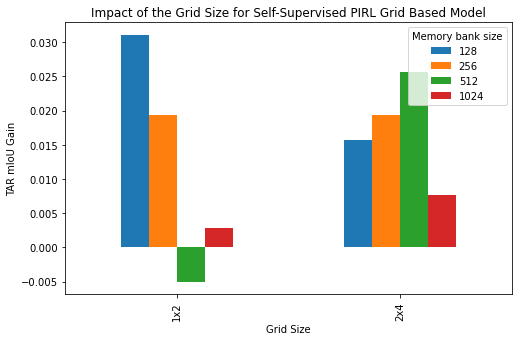

In [19]:
results_pirl2_pretr_miou['tar_classwise_iou_gain'].unstack().apply('max', axis=1).unstack().plot(kind='bar')
plt.title(r'Impact of the Grid Size for Self-Supervised PIRL Grid Based Model')
plt.xlabel(r'Grid Size')
plt.ylabel(r'TAR mIoU Gain')
plt.legend(title=r'Memory bank size', loc='upper right')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2_grid_size.png', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2_grid_size.pdf', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2_grid_size.svg', format='svg', bbox_inches='tight')

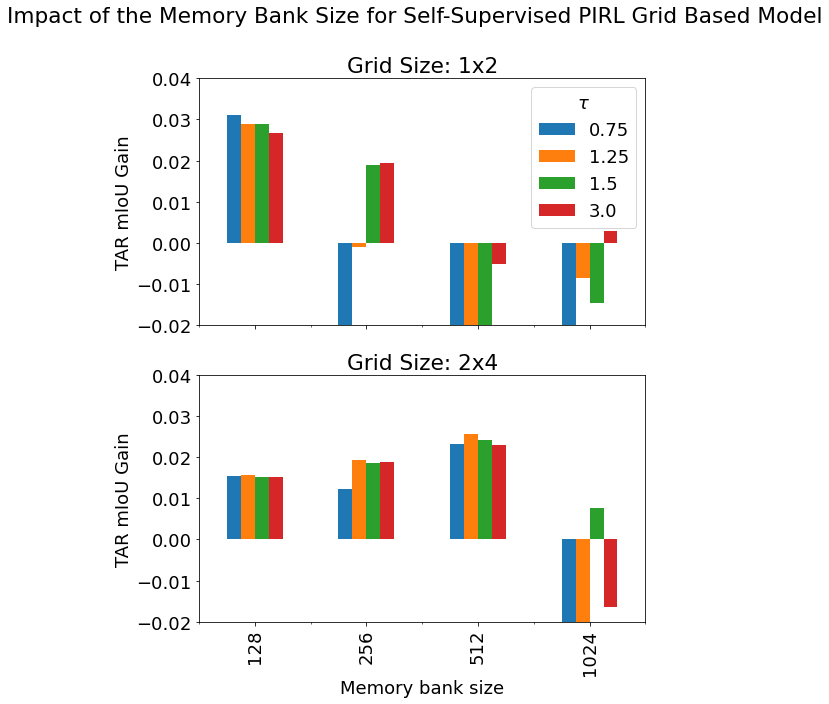

In [54]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(2, figsize=[plt.rcParams['figure.figsize'][0], 
                                   plt.rcParams['figure.figsize'][1]*2],
                      sharex=True)
grid_size = results_pirl2_pretr_miou.index.levels[0]
for g in range(len(grid_size)):
    results_pirl2_pretr_miou['tar_classwise_iou_gain'][grid_size[g]].unstack().plot(kind='bar', legend=False, ax=ax[g])
    if g == 0:
        ax[g].legend(title=r'$\tau$', loc='upper right')
    ax[g].set_title(r'Grid Size: {}'.format(grid_size[g]))
    ax[g].set_xlabel(r'Memory bank size')
    ax[g].set_ylabel(r'TAR mIoU Gain')
    ax[g].set_ylim(-0.02, 0.04)
fig.suptitle(r'Impact of the Memory Bank Size for Self-Supervised PIRL Grid Based Model')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2.png', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2.pdf', bbox_inches='tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_pirl2.svg', format='svg', bbox_inches='tight')
plt.show()

In [53]:
results_pirl2_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_pirl2_pretr_miou.tex', float_format="%.3f", 
                                  columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                  bold_rows=True, multicolumn=True, multirow=True, 
                                  caption='Self-Supervised PIRL Grid Based Model', 
                                  label='table:pirl2_pretr_ablation')

In [24]:
results_rot_da_pretr = seml.get_results('segmentation_pretrain_rot_da_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [25]:
results_rot_da_pretr_miou = \
results_rot_da_pretr[['config.da_injection_point', 'config.aux_injection_point', 'config.lambda_aux', 
                      'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                      'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                 {'config.da_injection_point': lambda x: x, 
                  'config.aux_injection_point': lambda x: x, 
                  'config.lambda_aux': lambda x: x,
                  'result.src_pixel_accuracy': lambda x: x,
                  'result.src_classwise_iou': lambda x: sum(x)/len(x),
                  'result.tar_pixel_accuracy': lambda x: x,
                  'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_rot_da_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_rot_da_pretr_miou['result.tar_classwise_iou']
results_rot_da_pretr_miou['tar_classwise_iou_gain'] = results_rot_da_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_rot_da_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_rot_da_pretr_miou['result.tar_pixel_accuracy']
results_rot_da_pretr_miou['tar_pixel_accuracy_gain'] = results_rot_da_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_rot_da_pretr_miou = results_rot_da_pretr_miou.groupby(by=['config.aux_injection_point',  'config.lambda_aux', 'config.da_injection_point']).max()
results_rot_da_pretr_miou

result.src_pixel_accuracy  \
config.aux_injection_point config.lambda_aux config.da_injection_point                              
feature                    0.005             feature                                     0.931030   
                                             output                                      0.930044   
                           0.050             feature                                     0.926683   
                                             output                                      0.928855   
                           0.500             feature                                     0.930485   
                                             output                                      0.928866   
output                     0.005             feature                                     0.923209   
                                             output                                      0.933384   
                           0.050             feature                                     0.926943   
                                             output                                      0.933492   
                           0.500             feature                                     0.920834   
                                             output                                      0.933186   

                                                                        result.src_classwise_iou  \
config.aux_injection_point config.lambda_aux config.da_injection_point                             
feature                    0.005             feature                                    0.665696   
                                             output                                     0.672954   
                           0.050             feature                                    0.662429   
                                             output                                     0.671248   
                           0.500             feature                                    0.665194   
                                             output                                     0.672211   
output                     0.005             feature                                    0.658029   
                                             output                                     0.677449   
                           0.050             feature                                    0.661717   
                                             output                                     0.677454   
                           0.500             feature                                    0.653325   
                                             output                                     0.675041   

                                                                        result.tar_pixel_accuracy  \
config.aux_injection_point config.lambda_aux config.da_injection_point                              
feature                    0.005             feature                                     0.772879   
                                             output                                      0.824605   
                           0.050             feature                                     0.815027   
                                             output                                      0.826367   
                           0.500             feature                                     0.797603   
                                             output                                      0.821465   
output                     0.005             feature                                     0.831440   
                                             output                                      0.817075   
                           0.050             feature                                     0.820247   
                                             output                                      0.819172   
                           0.500            

In [138]:
results_rot_da_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_rot_da_pretr_miou.tex', float_format="%.3f", 
                                   columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                   bold_rows=True, multicolumn=True, multirow=True, 
                                   caption='Adversarial Domain Discrimination & Self-Supervised Rotation Prediction Based Model', 
                                   label='table:rot_da_pretr_ablation')

In [26]:
results_jigsaw_da_pretr = seml.get_results('segmentation_pretrain_jigsaw_da_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [27]:
results_jigsaw_da_pretr_miou = \
results_jigsaw_da_pretr[['config.da_injection_point', 'config.aux_injection_point', 'config.lambda_aux', 
                         'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                         'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                 {'config.da_injection_point': lambda x: x, 
                  'config.aux_injection_point': lambda x: x, 
                  'config.lambda_aux': lambda x: x,
                  'result.src_pixel_accuracy': lambda x: x,
                  'result.src_classwise_iou': lambda x: sum(x)/len(x),
                  'result.tar_pixel_accuracy': lambda x: x,
                  'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_jigsaw_da_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_jigsaw_da_pretr_miou['result.tar_classwise_iou']
results_jigsaw_da_pretr_miou['tar_classwise_iou_gain'] = results_jigsaw_da_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_jigsaw_da_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_jigsaw_da_pretr_miou['result.tar_pixel_accuracy']
results_jigsaw_da_pretr_miou['tar_pixel_accuracy_gain'] = results_jigsaw_da_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_jigsaw_da_pretr_miou  = results_jigsaw_da_pretr_miou.groupby(by=['config.aux_injection_point',  'config.lambda_aux', 'config.da_injection_point']).max()
results_jigsaw_da_pretr_miou

result.src_pixel_accuracy  \
config.aux_injection_point config.lambda_aux config.da_injection_point                              
feature                    0.005             feature                                     0.933140   
                                             output                                      0.931046   
                           0.050             feature                                     0.932938   
                                             output                                      0.931034   
                           0.500             feature                                     0.932867   
                                             output                                      0.930820   
output                     0.005             feature                                     0.933416   
                                             output                                      0.928878   
                           0.050             feature                                     0.933079   
                                             output                                      0.929582   
                           0.500             feature                                     0.932209   
                                             output                                      0.921712   

                                                                        result.src_classwise_iou  \
config.aux_injection_point config.lambda_aux config.da_injection_point                             
feature                    0.005             feature                                    0.668591   
                                             output                                     0.676508   
                           0.050             feature                                    0.671879   
                                             output                                     0.676647   
                           0.500             feature                                    0.671008   
                                             output                                     0.676772   
output                     0.005             feature                                    0.668762   
                                             output                                     0.672721   
                           0.050             feature                                    0.669085   
                                             output                                     0.673460   
                           0.500             feature                                    0.663954   
                                             output                                     0.664839   

                                                                        result.tar_pixel_accuracy  \
config.aux_injection_point config.lambda_aux config.da_injection_point                              
feature                    0.005             feature                                     0.748577   
                                             output                                      0.832850   
                           0.050             feature                                     0.798826   
                                             output                                      0.832965   
                           0.500             feature                                     0.802455   
                                             output                                      0.822942   
output                     0.005             feature                                     0.802143   
                                             output                                      0.820763   
                           0.050             feature                                     0.813556   
                                             output                                      0.823919   
                           0.500            

In [148]:
results_jigsaw_da_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_jigsaw_da_pretr_miou.tex', float_format="%.3f", 
                                      columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                      bold_rows=True, multicolumn=True, multirow=True, 
                                      caption='Adversarial Domain Discrimination & Self-Supervised Jigsaw Puzzle Permutation Prediction Based Model', 
                                      label='table:jigsaw_da_pretr_ablation')

In [2]:
results_pirl2_da_pretr = seml.get_results('segmentation_pretrain_pirl2_da_ablation', to_data_frame=True)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [10]:
results_pirl2_da_pretr_miou = \
results_pirl2_da_pretr[['config.grid_size', 'config.da_injection_point', 
                        'config.temperature', 'config.memory_bank_params', 
                        'result.src_pixel_accuracy', 'result.src_classwise_iou', 
                        'result.tar_pixel_accuracy','result.tar_classwise_iou']].apply(
                 {'config.grid_size': lambda x: str(x[0]) + 'x' + str(x[1]), 
                  'config.da_injection_point': lambda x: x, 
                  'config.temperature': lambda x: x, 
                  'config.memory_bank_params': lambda x: x[0],
                  'result.src_pixel_accuracy': lambda x: x,
                  'result.src_classwise_iou': lambda x: sum(x)/len(x),
                  'result.tar_pixel_accuracy': lambda x: x,
                  'result.tar_classwise_iou': lambda x: sum(x)/len(x)}).sort_values(by=['result.tar_classwise_iou'], ascending=False)
results_pirl2_da_pretr_miou['tar_classwise_iou_gap'] = oracle_model_miou - results_pirl2_da_pretr_miou['result.tar_classwise_iou']
results_pirl2_da_pretr_miou['tar_classwise_iou_gain'] = results_pirl2_da_pretr_miou['result.tar_classwise_iou'] - src_model_miou
results_pirl2_da_pretr_miou['tar_pixel_accuracy_gap'] = oracle_model_pixel_accuracy - results_pirl2_da_pretr_miou['result.tar_pixel_accuracy']
results_pirl2_da_pretr_miou['tar_pixel_accuracy_gain'] = results_pirl2_da_pretr_miou['result.tar_pixel_accuracy'] - src_model_pixel_accuracy
results_pirl2_da_pretr_miou = results_pirl2_da_pretr_miou.groupby(by=['config.grid_size', 'config.memory_bank_params',  'config.temperature', 'config.da_injection_point']).max()
results_pirl2_da_pretr_miou

result.src_pixel_accuracy  \
config.grid_size config.memory_bank_params config.temperature config.da_injection_point                              
1x2              128                       0.75               feature                                     0.927943   
                                                              output                                      0.927876   
                                           1.25               feature                                     0.926590   
                                                              output                                      0.928644   
                                           1.50               feature                                     0.923955   
                                                              output                                      0.927181   
                                           3.00               feature                                     0.928616   
                                                              output                                      0.928684   
                 256                       0.75               feature                                     0.933121   
                                                              output                                      0.930703   
                                           1.25               feature                                     0.928677   
                                                              output                                      0.932284   
                                           1.50               feature                                     0.931283   
                                                              output                                      0.932986   
                                           3.00               feature                                     0.931533   
                                                              output                                      0.933461   
2x4              256                       0.75               feature                                     0.932855   
                                                              output                                      0.933146   
                                           1.25               feature                                     0.932260   
                                                              output                                      0.933248   
                                           1.50               feature                                     0.933087   
                                                              output                                      0.933101   
                                           3.00               feature                                     0.933347   
                                                              output                                      0.933128   
                 512                       0.75               feature                                     0.930712   
                                                              output                                      0.932559   
                                           1.25               feature                                     0.926498   
                                                              output                                      0.932977   
                                           1.50               feature                                     0.930117   
                                                              output                                      0.933302   
                                           3.00               feature                                     0.926767   
                                                              output                                      0.933262   

                                                                            

In [167]:
results_pirl2_da_pretr_miou.to_latex('/nfs/students/mirlas/tables/results_pirl2_da_pretr_miou.tex', float_format="%.3f", 
                                      columns=['result.tar_classwise_iou', 'tar_classwise_iou_gain'],
                                      bold_rows=True, multicolumn=True, multirow=True, 
                                      caption='Adversarial Domain Discrimination & Self-Supervised PIRL Grid Based Model', 
                                      label='table:pirl2_da_pretr_ablation')

In [30]:
experiments = [results_src, results_tar, results_da, results_da_pretr, results_rot_pretr, results_jigsaw_pretr,
               results_pirl_pretr, results_pirl2_pretr, results_rot_da_pretr, results_jigsaw_da_pretr, results_pirl2_da_pretr]
names = [x['config.db_collection'][0] for x in experiments]
argmaxes = [x['result.tar_classwise_iou'].apply(lambda x: np.mean(np.array(x))).argmax() for x in experiments]
tar_pixelwise_ious = [x['result.tar_pixel_accuracy'][argmaxes[i]] for i, x in enumerate(experiments)]
tar_classwise_ious = [np.array(x['result.tar_classwise_iou'][argmaxes[i]]) for i, x in enumerate(experiments)]
tar_mious = [np.mean(x) for x in tar_classwise_ious]
final_df = pd.DataFrame(index=names, columns=CLASSES + ['pixelwise_accuracy', 'mIoU'], dtype=float)
final_df[CLASSES] = tar_classwise_ious
final_df['pixelwise_accuracy'] = tar_pixelwise_ious
final_df['mIoU'] = tar_mious

tar_argmax = results_tar['result.src_classwise_iou'].apply(lambda x: np.mean(np.array(x))).argmax()
final_df.loc['segmentation_loss_tar_ablation', 'pixelwise_accuracy'] = results_tar['result.src_pixel_accuracy'][tar_argmax]
final_df.loc['segmentation_loss_tar_ablation', CLASSES] = results_tar['result.src_classwise_iou'][tar_argmax]
final_df.loc['segmentation_loss_tar_ablation', 'mIoU'] = np.array(results_tar['result.src_classwise_iou'][tar_argmax]).mean()

In [31]:
final_df.sort_values(by='mIoU').loc[:, CLASSES]

,road,sidewalk,building,wall,fence,pole,light,sign,vegetation,terrain,sky,person,rider,car,truck,bus,train,motocycle,bicycle
segmentation_da_ablation,0.847926,0.374720,0.738853,0.210857,0.202892,0.242087,0.215107,0.139196,0.666614,0.337940,0.477428,0.412888,0.057277,0.749683,0.246060,0.159768,0.029318,0.182658,0.024661
segmentation_loss_ablation,0.586555,0.187731,0.741296,0.169066,0.156268,0.243195,0.255033,0.160738,0.813811,0.337648,0.751691,0.506609,0.125153,0.734768,0.205683,0.171476,0.027807,0.211577,0.100651
segmentation_pretrain_pirl_ablation,0.723525,0.223906,0.774063,0.234384,0.195534,0.212184,0.176277,0.099708,0.810168,0.340681,0.796032,0.521594,0.098203,0.771667,0.241422,0.225600,0.040915,0.223035,0.074106
segmentation_pretrain_jigsaw_ablation,0.701847,0.208516,0.783090,0.217289,0.181560,0.242269,0.252294,0.151090,0.815105,0.354219,0.782715,0.514984,0.124387,0.786207,0.233081,0.242993,0.053163,0.264814,0.081191
segmentation_pretrain_pirl2_ablation,0.733020,0.216363,0.789291,0.249526,0.167436,0.258633,0.265094,0.163587,0.822068,0.346251,0.783184,0.518262,0.122010,0.775563,0.257365,0.249237,0.040453,0.222004,0.098252
segmentation_pretrain_da_ablation,0.825352,0.307708,0.773386,0.242262,0.146276,0.251487,0.238466,0.150328,0.811875,0.326600,0.715697,0.513288,0.136791,0.754156,0.205653,0.211099,0.053541,0.282181,0.147377
segmentation_pretrain_pirl2_da_ablation,0.836328,0.284591,0.792877,0.259050,0.198820,0.250309,0.232314,0.155241,0.808228,0.334213,0.748386,0.510272,0.129656,0.788837,0.219245,0.261919,0.043956,0.192560,0.075757
segmentation_pretrain_rot_ablation,0.747660,0.232448,0.799790,0.247754,0.208108,0.251494,0.236251,0.146410,0.815941,0.345951,0.791680,0.513936,0.131282,0.785194,0.251165,0.251947,0.030106,0.228777,0.106925
segmentation_pretrain_jigsaw_da_ablation,0.835293,0.327716,0.776903,0.233399,0.187066,0.280430,0.253889,0.173968,0.799113,0.315803,0.679089,0.513484,0.142771,0.771224,0.199079,0.223483,0.052573,0.236290,0.125367
segmentation_pretrain_rot_da_ablation,0.810605,0.310981,0.794712,0.242605,0.204888,0.272852,0.270025,0.155630,0.819476,0.330403,0.710650,0.512077,0.116907,0.765680,0.238564,0.243272,0.046035,0.253186,0.146277


In [36]:
classwise_ious = final_df.sort_values(by='mIoU').loc[:, CLASSES]
classwise_ious = classwise_ious.T.iloc[:, [1, 0, 3, 4, 5, 6, 7, 8, 9, 10]]

In [37]:
classwise_ious.to_csv('/nfs/students/mirlas/tables/classwise_comparison.csv')

In [38]:
classwise_ious.to_latex('/nfs/students/mirlas/tables/classwise_comparison.tex', float_format="%.2f", 
                        bold_rows=True, multicolumn=True, multirow=True, 
                        caption='Comparison of the Classwise IoU for Different Models', 
                        label='table:classwise_comparison')

In [34]:
mIoUs = final_df[['pixelwise_accuracy', 'mIoU']].sort_values(by=['mIoU', 'pixelwise_accuracy'])
mIoUs

,pixelwise_accuracy,mIoU
segmentation_da_ablation,0.805098,0.332418
segmentation_loss_ablation,0.738352,0.341408
segmentation_pretrain_pirl_ablation,0.794392,0.357000
segmentation_pretrain_jigsaw_ablation,0.788746,0.367938
segmentation_pretrain_pirl2_ablation,0.801203,0.372505
segmentation_pretrain_da_ablation,0.833043,0.373343
segmentation_pretrain_pirl2_da_ablation,0.837900,0.374872
segmentation_pretrain_rot_ablation,0.806724,0.374885
segmentation_pretrain_jigsaw_da_ablation,0.832965,0.375102
segmentation_pretrain_rot_da_ablation,0.829906,0.381307


In [39]:
mIoUs.to_latex('/nfs/students/mirlas/tables/miou_comparison.tex', float_format="%.3f", 
                bold_rows=True, multicolumn=True, multirow=True, 
                caption='Comparison of the Target Metrics for Different Models', 
                label='table:miou_comparison')